In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from openpyxl import Workbook
import seaborn as sns

In [6]:
DirPath = "D:/FingerPrint_Dataset/Logs/CrossMatch/cross_all_v18/test_latest/images/"
figureNames = ["resized_102_real_A.png", "resized_102_real_B.png", "resized_102_fake_B.png"]

In [7]:
images = []
for i in range(3):
    images.append(mpimg.imread(DirPath + figureNames[i]))

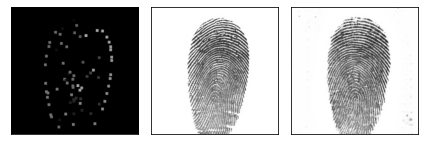

In [11]:
plt.figure(figsize=(6,6))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
plt.tight_layout()
plt.show()

In [14]:
file_loc_list = ["D:/FingerPrint_Dataset/Results/cross_all_v18.xlsx",
                "D:/FingerPrint_Dataset/Results/cross_all_v19.xlsx",
                "D:/FingerPrint_Dataset/Results/cross_da_v20.xlsx",
                "D:/FingerPrint_Dataset/Results/U_R_U_All_V10.xlsx",
                "D:/FingerPrint_Dataset/Results/U_R_U_All_V14.xlsx",
                "D:/FingerPrint_Dataset/Results/U_R_U_DA_V19.xlsx"]

list1 = []
for filename in file_loc_list:
    tempDf = pd.read_excel(filename, index_col=None, na_values=['NA'], usecols="B")
    list1.append(tempDf.values.tolist())

In [56]:
lst = []
for count, itemList in enumerate(list1):
    lst.append([])
    for item in itemList:
        lst[count].append(item[0])

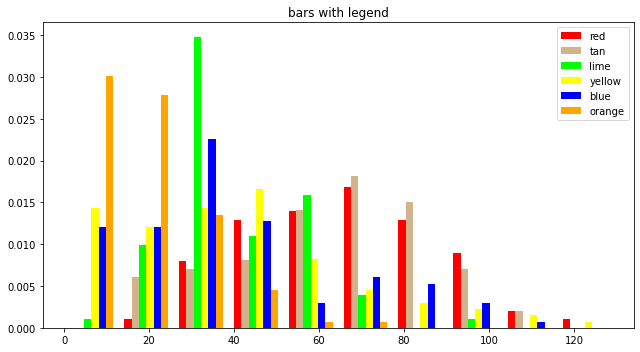

In [31]:
np.random.seed(19680801)
n_bins = 10
x1 = np.random.randn(1000, 6)

fig, ax6 = plt.subplots(figsize=(9,5))
colors1 = ['red', 'tan', 'lime', 'yellow', 'blue', 'orange']


ax6.hist(lst, n_bins, density=True, histtype='bar', color=colors1, label=colors1)

ax6.legend(prop={'size': 10})
ax6.set_title('bars with legend')

fig.tight_layout()
plt.show()

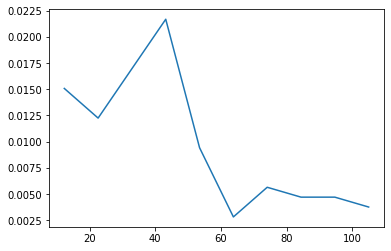

In [58]:
import matplotlib.pyplot as plt
dat=[-1,2,1,4,-5,3,6,1,2,1,2,5,6,5,6,2,2,2]
a=plt.hist(lst[4],density=True)
# b=plt.hist(dat,density=True)
plt.close()
plt.figure()
plt.plot(a[1][1:],a[0])   

In [52]:
file_loc_list = ["D:/FingerPrint_Dataset/Results/cross_all_v18.xlsx",
                "D:/FingerPrint_Dataset/Results/cross_all_v19.xlsx",
                "D:/FingerPrint_Dataset/Results/cross_da_v20.xlsx",
                "D:/FingerPrint_Dataset/Results/U_R_U_All_V10.xlsx",
                "D:/FingerPrint_Dataset/Results/U_R_U_All_V14.xlsx",
                "D:/FingerPrint_Dataset/Results/U_R_U_DA_V19.xlsx"]

file_names = ["CrossMatch1",
              "CrossMatch2",
              "CrossMatch3",
              "U_R_U1",
              "U_R_U2",
              "U_R_U3"]

df = None
all_data = pd.DataFrame()
for count,filename in enumerate(file_loc_list):
    df = pd.read_excel(filename, header=None)
    df['Dataset'] =str(file_names[count])
    all_data = all_data.append(df,ignore_index=True)

In [53]:
all_data.rename(columns={1: 'score', 2: 'fake_images', 3: 'real_images'}, inplace=True)
all_data

,0,score,fake_images,real_images,Dataset
0,1,64,resized_102_fake_B.png,resized_102_real_B.png,CrossMatch1
1,2,92,resized_107_fake_B.png,resized_107_real_B.png,CrossMatch1
2,3,98,resized_10_fake_B.png,resized_10_real_B.png,CrossMatch1
3,4,64,resized_117_fake_B.png,resized_117_real_B.png,CrossMatch1
4,5,42,resized_123_fake_B.png,resized_123_real_B.png,CrossMatch1
...,...,...,...,...,...
543,100,19,resized_076_8_5_fake_B.png,resized_076_8_5_real_B.png,U_R_U3
544,101,33,resized_076_9_2_fake_B.png,resized_076_9_2_real_B.png,U_R_U3
545,102,21,resized_076_9_6_fake_B.png,resized_076_9_6_real_B.png,U_R_U3
546,103,28,resized_076_9_7_fake_B.png,resized_076_9_7_real_B.png,U_R_U3


<AxesSubplot:xlabel='score', ylabel='Count'>

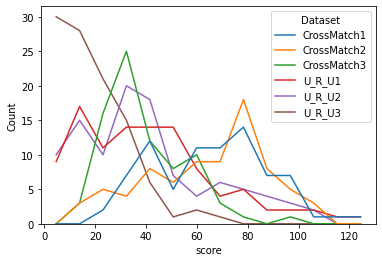

In [54]:
sns.histplot(all_data, x="score", hue="Dataset", element="poly", fill=False)